<a href="https://colab.research.google.com/github/sdave-connexion/web-traffic-forecasting/blob/main/time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data
df = pd.read_csv('/content/all.csv')
#Printing head
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    79 non-null     object
 1   visits  79 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [24]:

#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df[0:68] 
test=df[68:]

#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.date,format='%m/%d/%Y') 
df.index = df.Timestamp 
df = df.resample('W').mean()
train.Timestamp = pd.to_datetime(train.date,format='%m/%d/%Y') 
train.index = train.Timestamp 
train = train.resample('W').mean() 
test.Timestamp = pd.to_datetime(test.date,format='%m/%d/%Y') 
test.index = test.Timestamp 
test = test.resample('W').mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]


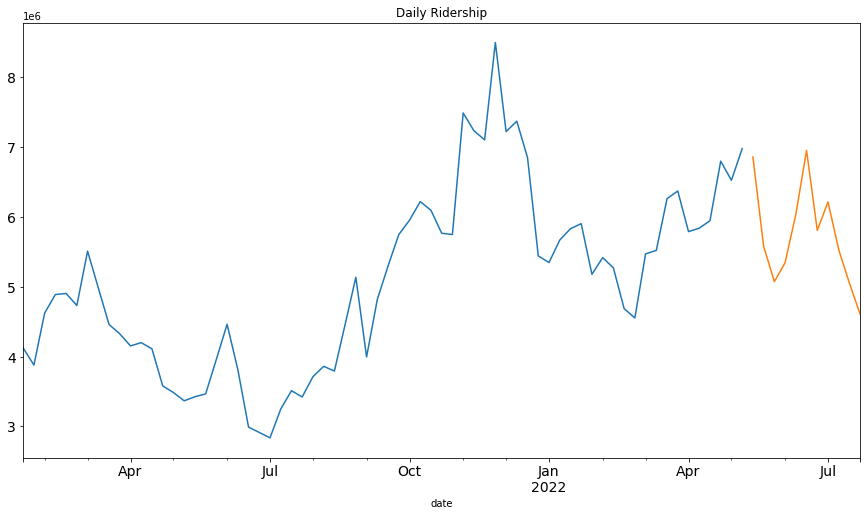

In [28]:
#Plotting data
train.visits.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.visits.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

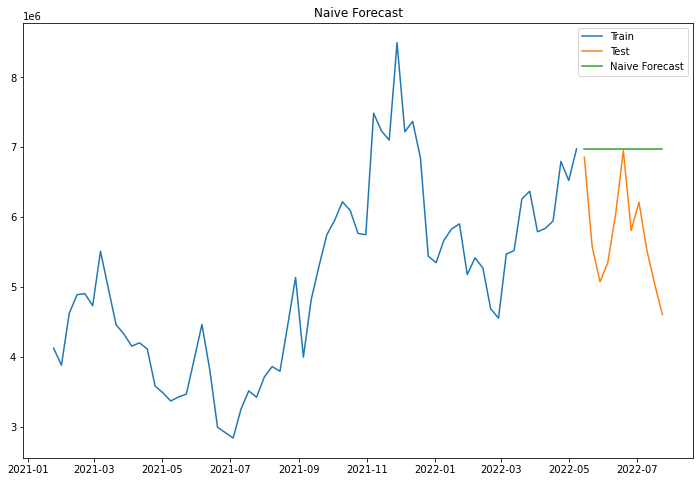

In [29]:
dd= np.asarray(train.visits)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['visits'], label='Train')
plt.plot(test.index,test['visits'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.visits, y_hat.naive))
print(rms)


1430541.2790465013


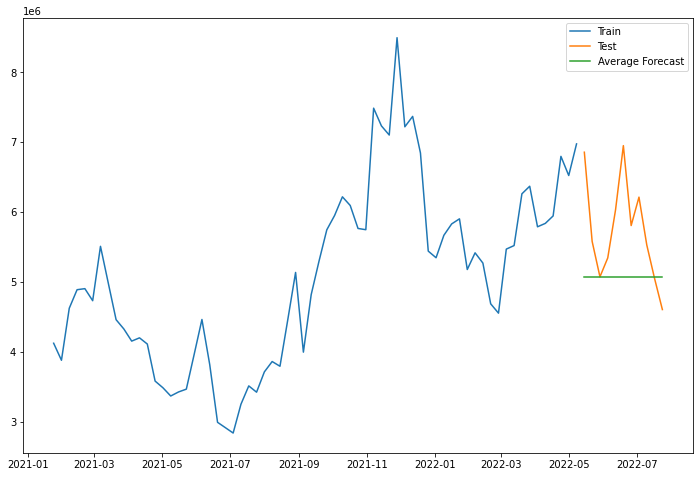

In [31]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['visits'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['visits'], label='Train')
plt.plot(test['visits'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [33]:
rms = sqrt(mean_squared_error(test.visits, y_hat_avg.avg_forecast))
print(rms)


968990.4393272137


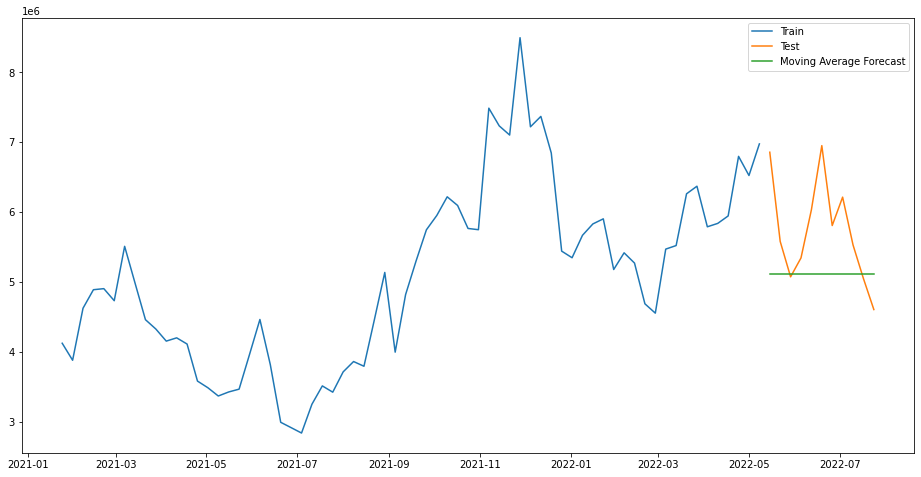

In [34]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['visits'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['visits'], label='Train')
plt.plot(test['visits'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()


In [35]:
rms = sqrt(mean_squared_error(test.visits, y_hat_avg.moving_avg_forecast))
print(rms)

936606.1191208718


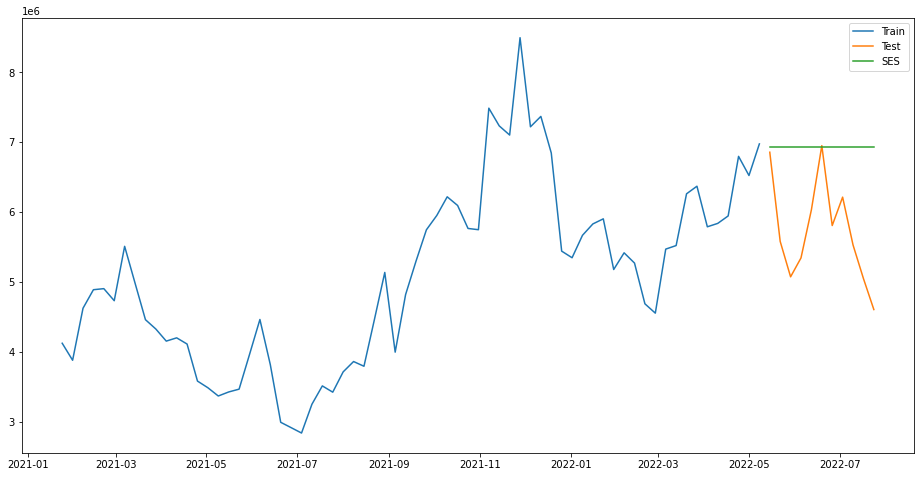

In [37]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['visits'])).fit(smoothing_level=0.9,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['visits'], label='Train')
plt.plot(test['visits'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


In [38]:
rms = sqrt(mean_squared_error(test.visits, y_hat_avg.SES))
print(rms)

1392980.7149420874


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  This is separate from the ipykernel package so we can avoid doing imports until


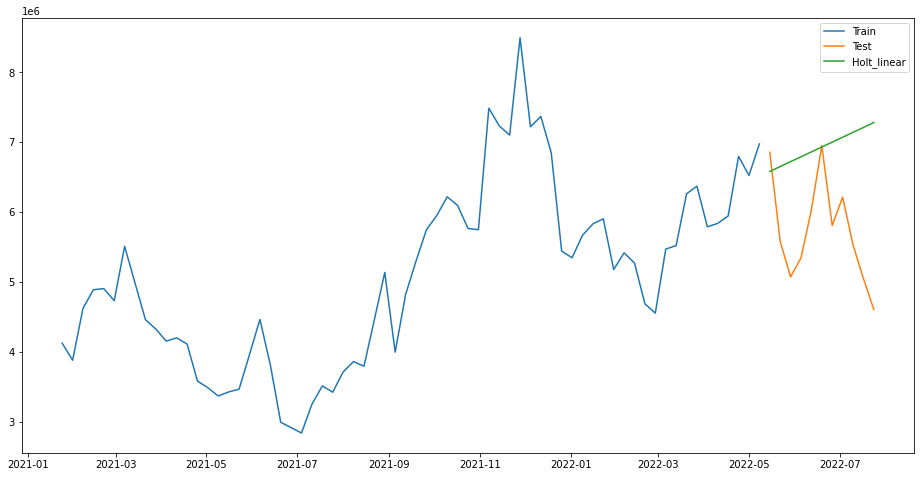

In [40]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['visits'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['visits'], label='Train')
plt.plot(test['visits'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


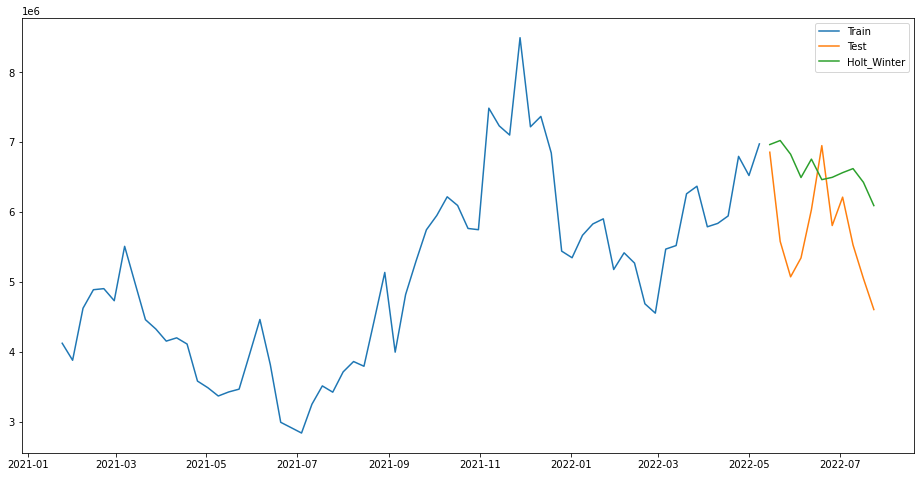

In [41]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['visits']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['visits'], label='Train')
plt.plot(test['visits'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [44]:
test

,visits
date,
2022-05-15,6856494.0
2022-05-22,5579881.0
2022-05-29,5072812.0
2022-06-05,5343532.0
2022-06-12,6032849.0
2022-06-19,6950765.0
2022-06-26,5806968.0
2022-07-03,6213496.0
2022-07-10,5529186.0


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


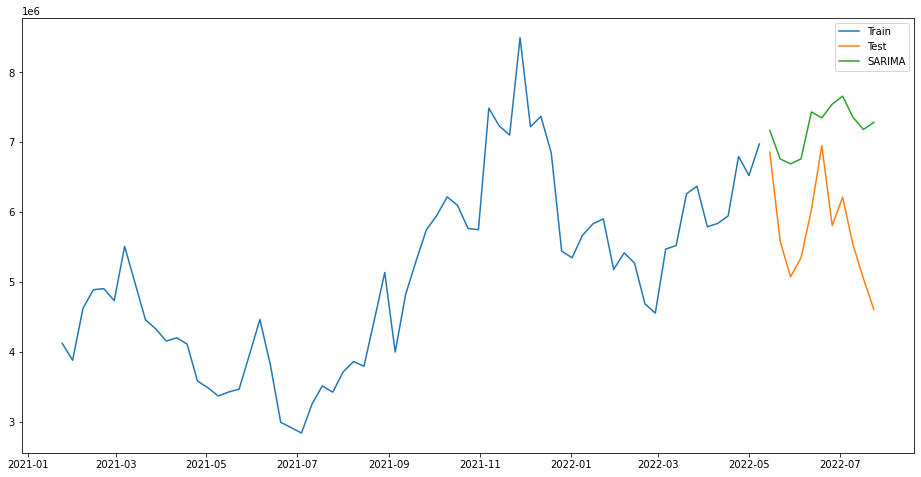

In [45]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.visits, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2022-05-15", end="2022-07-24", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['visits'], label='Train')
plt.plot(test['visits'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()